# Parti 1 - Data

***le dataset Cifar-10 sont des image 32*32 de 10 objet differents:
  ***--Avion, voitur, oiseau, chat, cerf, chien, grenouille, cheval, bateau, camion
  -- ce sont des images en couleur***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

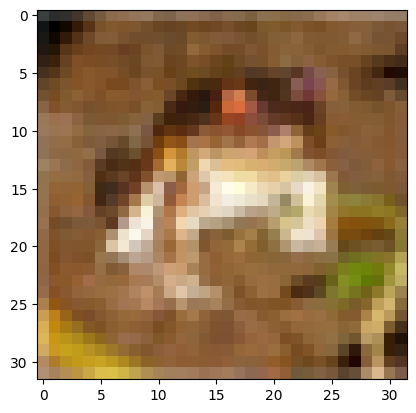

In [8]:
plt.imshow(x_train[0])

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
from tensorflow.keras.utils import to_categorical   

In [12]:
y_cat_train = to_categorical(y_train, 10)

In [13]:
y_cat_test = to_categorical(y_test, 10)

In [14]:
y_cat_train.shape

(50000, 10)

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [18]:
y_train[0]

array([6], dtype=uint8)

In [20]:
32*32*3

3072

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten 

In [21]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [26]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15


1563/1563 [==============================] - 14s 8ms/step - loss: 1.5393 - accuracy: 0.4408 - val_loss: 1.3482 - val_accuracy: 0.5134
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2377 - accuracy: 0.5586 - val_loss: 1.2110 - val_accuracy: 0.5793
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0962 - accuracy: 0.6171 - val_loss: 1.0637 - val_accuracy: 0.6250
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9838 - accuracy: 0.6555 - val_loss: 1.0389 - val_accuracy: 0.6423
Epoch 5/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9011 - accuracy: 0.6862 - val_loss: 0.9847 - val_accuracy: 0.6555
Epoch 6/15
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8162 - accuracy: 0.7144 - val_loss: 0.9936 - val_accuracy: 0.6562
Epoch 7/15
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7547 - accuracy: 0.7369 - val_loss: 0.9869 - val_

# Parti 2 - Evaluation du modele

In [27]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.539341,0.44080,1.348241,0.5134
1,1.237670,0.55856,1.210966,0.5793
2,1.096165,0.61710,1.063654,0.6250
3,0.983826,0.65550,1.038906,0.6423
4,0.901138,0.68620,0.984736,0.6555
5,0.816213,0.71444,0.993622,0.6562
6,0.754681,0.73686,0.986881,0.6648


In [28]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot: >

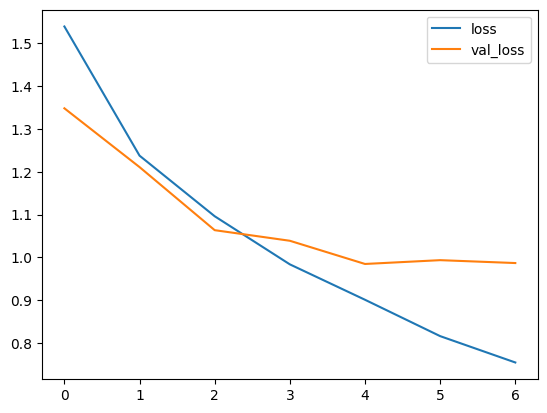

In [29]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot: >

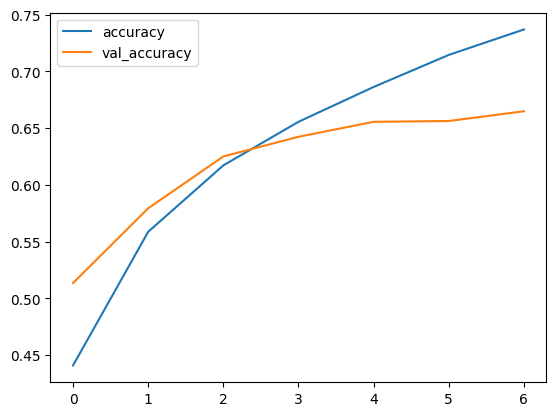

In [30]:
metrics[['accuracy', 'val_accuracy']].plot()

In [31]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.9868805408477783, 0.6647999882698059]

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
prections = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 4ms/step


In [34]:
print(classification_report(y_test, prections))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1000
           1       0.73      0.84      0.78      1000
           2       0.61      0.49      0.54      1000
           3       0.50      0.45      0.47      1000
           4       0.58      0.62      0.60      1000
           5       0.62      0.46      0.53      1000
           6       0.67      0.79      0.73      1000
           7       0.64      0.77      0.70      1000
           8       0.80      0.77      0.78      1000
           9       0.78      0.72      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



<AxesSubplot: >

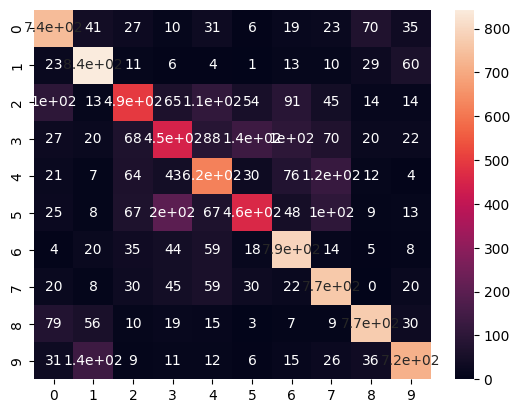

In [36]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, prections), annot=True)    

In [43]:
my_image = x_test[16]

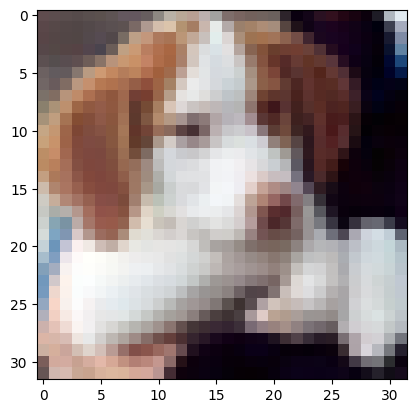

In [44]:
plt.imshow(my_image)

In [46]:
y_test[16]

array([5], dtype=uint8)

In [47]:
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)), axis=1)

1/1 [==============================] - 0s 31ms/step


array([5], dtype=int64)